In [2]:
%%capture
!wget https://www.dropbox.com/s/q8nfr74hfkg45iz/tmdb_5000_credits.csv?dl=0
!wget https://www.dropbox.com/s/9q1qa7881qjtlbt/tmdb_5000_movies.csv?dl=0

In [3]:
import pandas as pd 
import numpy as np 
df1=pd.read_csv('tmdb_5000_credits.csv?dl=0')
df2=pd.read_csv('tmdb_5000_movies.csv?dl=0')

In [4]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [9]:
C= df2['vote_average'].mean()
print("Mean Average Voting : ",C)

m= df2['vote_count'].quantile(0.9)
print("\nTaking the movies which have 90% more voters than the other movies")
print("Minimum votes required : ",m)

Mean Average Voting :  6.092171559442016

Taking the movies which have 90% more voters than the other movies
Minimum votes required :  1838.4000000000015


In [10]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]

In [11]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [12]:
q_movies = q_movies.sort_values('score', ascending=False)

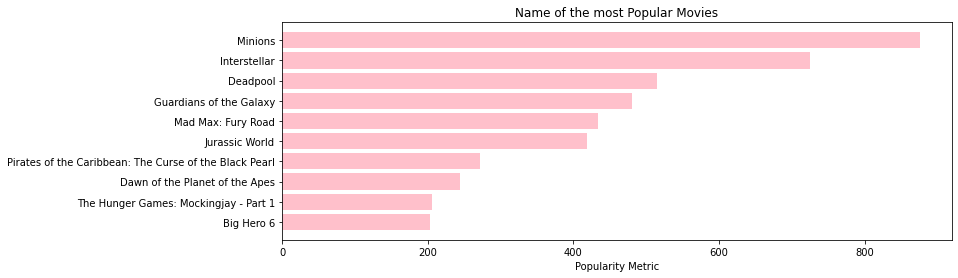

In [42]:
pop= df2.sort_values('popularity', ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4),facecolor="w")

plt.barh(pop['title'].head(10),pop['popularity'].head(10), 
         align='center',color='pink')
plt.gca().invert_yaxis()

plt.xlabel("Popularity Metric")
plt.title("Name of the most Popular Movies")
plt.show()